In [1]:
import os
import yaml
import matplotlib.pyplot as plt
import string
from data.utils import CheckboxSelector

root_dir = '../data/data'
data_sources = [d for d in os.listdir(root_dir) if os.path.isdir(f'{root_dir}/{d}') and d != '__pycache__']

"""
Select datasets to compare
"""

data_selector_a = CheckboxSelector(data_sources, 'Select data sources (A)')
data_selector_a.display()


data_selector_b = CheckboxSelector(data_sources, 'Select data sources (B)')
data_selector_b.display()

2024-07-19 15:21:30,659 - uim - INFO - Completed configuring logger()!
2024-07-19 15:21:30,716 - uim.model.ink - INFO - Completed configuring logger()!
2024-07-19 15:21:30,716 - uim.model.ink - INFO - Completed configuring logger()!


Select data sources (A)


Checkbox(value=False, description='twelve_numbers')

Checkbox(value=False, description='pangram_jordan')

Checkbox(value=False, description='fliff')

Checkbox(value=False, description='fortune_coins')

Checkbox(value=False, description='player_name')

Checkbox(value=False, description='speech_jordan')

Checkbox(value=False, description='high5')

Checkbox(value=False, description='speech')

Checkbox(value=False, description='special_characters')

Checkbox(value=False, description='number')

Checkbox(value=False, description='IAM')

Checkbox(value=False, description='chumba_v2_jordan')

Checkbox(value=False, description='address')

Checkbox(value=False, description='chumba_v2')

Checkbox(value=False, description='chumba')

Checkbox(value=False, description='pangram')

Checkbox(value=False, description='email')

Select data sources (B)


Checkbox(value=False, description='twelve_numbers')

Checkbox(value=False, description='pangram_jordan')

Checkbox(value=False, description='fliff')

Checkbox(value=False, description='fortune_coins')

Checkbox(value=False, description='player_name')

Checkbox(value=False, description='speech_jordan')

Checkbox(value=False, description='high5')

Checkbox(value=False, description='speech')

Checkbox(value=False, description='special_characters')

Checkbox(value=False, description='number')

Checkbox(value=False, description='IAM')

Checkbox(value=False, description='chumba_v2_jordan')

Checkbox(value=False, description='address')

Checkbox(value=False, description='chumba_v2')

Checkbox(value=False, description='chumba')

Checkbox(value=False, description='pangram')

Checkbox(value=False, description='email')

In [2]:
"""
Set selections to variables
"""

data_sources_a = data_selector_a.get_selected_items()
data_sources_b = data_selector_b.get_selected_items()

In [3]:
"""
Combine analysis for data_sources
"""

def combine_analysis(data_sources, root_dir):
    combined_analysis = {}
    for ds in data_sources:
        # open the config.yaml file
        with open(f'{root_dir}/{ds}/config.yaml', 'r') as f:
            config = yaml.safe_load(f)
        analysis = config['analysis']
        for key, value in analysis.items():
            if key not in combined_analysis:
                combined_analysis[key] = value
            else:
                # If value is a dictionary, update the existing dictionary
                if isinstance(value, dict) and isinstance(combined_analysis[key], dict):
                    for sub_key, sub_value in value.items():
                        if sub_key not in combined_analysis[key]:
                            combined_analysis[key][sub_key] = sub_value
                        else:
                            combined_analysis[key][sub_key] += sub_value
                else:
                    combined_analysis[key] += value
    return combined_analysis

combined_analysis_a = combine_analysis(data_sources_a, root_dir)
combined_analysis_b = combine_analysis(data_sources_b, root_dir)

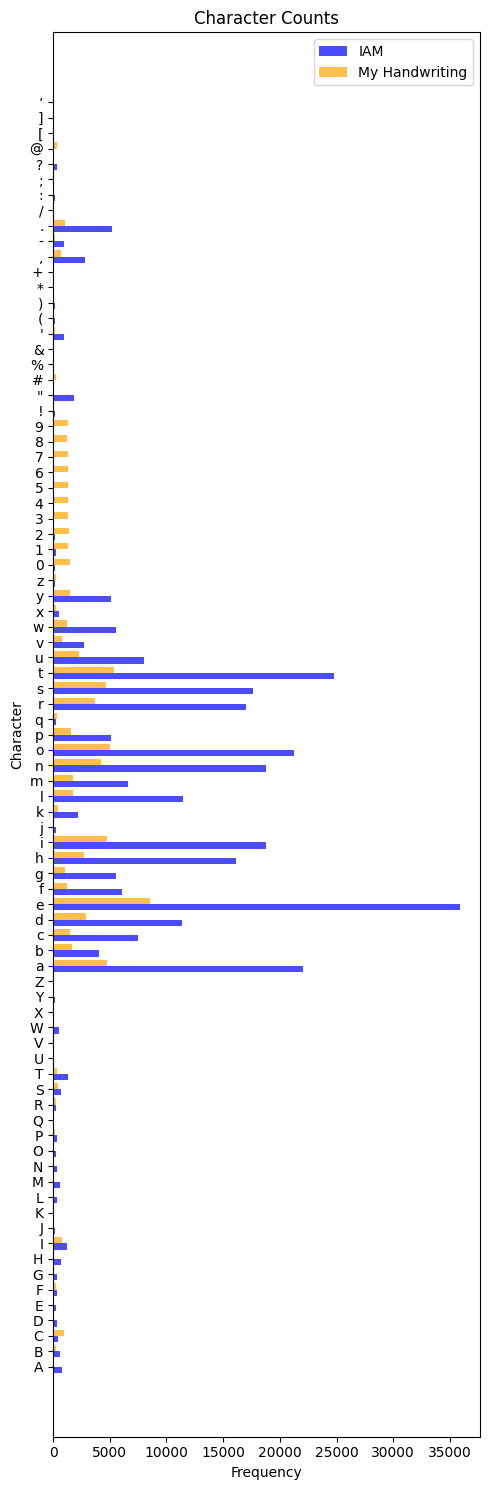

In [15]:
import matplotlib.pyplot as plt
import string

# Custom sort function to order: Uppercase A-Z, Lowercase a-z, Numbers 0-9, then Symbols
def custom_sort(key):
    if key in string.ascii_uppercase:
        return (0, key)
    elif key in string.ascii_lowercase:
        return (1, key)
    elif key in string.digits:
        return (2, key)
    else:
        return (3, key)

# Combine and sort keys, excluding spaces
all_keys = set(combined_analysis_a['character_dict'].keys()).union(set(combined_analysis_b['character_dict'].keys()))
all_keys.discard(' ')  # Remove space from the keys
sorted_keys = sorted(all_keys, key=custom_sort)

# Get sorted values
sorted_values_a = [combined_analysis_a['character_dict'].get(key, 0) for key in sorted_keys]
sorted_values_b = [combined_analysis_b['character_dict'].get(key, 0) for key in sorted_keys]

# Plot the combined analysis's character_dict in a single plot
fig, ax = plt.subplots(figsize=(5, 15))  # Adjusted plot size

bar_width = 0.4
y_positions = range(len(sorted_keys))

# Plot for combined_analysis_a
ax.barh(y_positions, sorted_values_a, height=bar_width, label='IAM', color='blue', alpha=0.7)

# Plot for combined_analysis_b (shifted by bar_width)
ax.barh([y + bar_width for y in y_positions], sorted_values_b, height=bar_width, label='My Handwriting', color='orange', alpha=0.7)

ax.set_yticks([y + bar_width / 2 for y in y_positions])
ax.set_yticklabels(sorted_keys)
ax.set_xlabel('Frequency')
ax.set_ylabel('Character')
ax.set_title('Character Counts')
ax.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [16]:
print('Combined Analysis A')
for key, value in combined_analysis_a.items():
    print(key, value)
    
print('Combined Analysis B')
for key, value in combined_analysis_b.items():
    print(key, value)


Combined Analysis A
character_dict {' ': 53115, '!': 166, '"': 1840, '#': 90, '%': 11, '&': 1, "'": 970, '(': 119, ')': 119, '*': 1, '+': 8, ',': 2826, '-': 955, '.': 5205, '/': 6, '0': 153, '1': 277, '2': 132, '3': 86, '4': 69, '5': 92, '6': 68, '7': 49, '8': 43, '9': 111, ':': 139, ';': 77, '?': 329, 'A': 749, 'B': 585, 'C': 441, 'D': 303, 'E': 251, 'F': 313, 'G': 303, 'H': 676, 'I': 1179, 'J': 158, 'K': 77, 'L': 304, 'M': 600, 'N': 316, 'O': 264, 'P': 349, 'Q': 19, 'R': 245, 'S': 697, 'T': 1281, 'U': 67, 'V': 78, 'W': 480, 'X': 4, 'Y': 192, 'Z': 7, '[': 3, ']': 3, 'a': 22005, 'b': 4032, 'c': 7495, 'd': 11392, 'e': 35866, 'f': 6097, 'g': 5558, 'h': 16107, 'i': 18763, 'j': 246, 'k': 2199, 'l': 11425, 'm': 6604, 'n': 18807, 'o': 21260, 'p': 5093, 'q': 283, 'r': 17040, 's': 17669, 't': 24808, 'u': 8014, 'v': 2739, 'w': 5556, 'x': 508, 'y': 5126, 'z': 175}
characters 351868
clean_characters 286741
clean_chars_per_char 0.8149107051507952
lines 12187
points 7651948
points_per_char 21.74664